In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data/temp_data_decomposed_stationarized.csv', index_col=0)
df.head(10)

,TG,diff,pct,month,monthly_mean,stationary_temp,detrend_div,detrend_sub
DATE,,,,,,,,
1876-01-01,275.35,NaN,NaN,1,-0.005496,NaN,NaN,NaN
1876-01-02,275.65,0.3,0.001090,1,-0.005496,0.305496,-54.582996,0.305496
1876-01-03,273.45,-2.2,-0.007981,1,-0.005496,-2.194504,400.275304,-2.194504
1876-01-04,267.35,-6.1,-0.022308,1,-0.005496,-6.094504,1109.854251,-6.094504
1876-01-05,263.35,-4.0,-0.014962,1,-0.005496,-3.994504,727.773279,-3.994504
1876-01-06,265.45,2.1,0.007974,1,-0.005496,2.105496,-382.080972,2.105496
1876-01-07,266.55,1.1,0.004144,1,-0.005496,1.105496,-200.137652,1.105496
1876-01-08,264.25,-2.3,-0.008629,1,-0.005496,-2.294504,418.469636,-2.294504
1876-01-09,260.45,-3.8,-0.014380,1,-0.005496,-3.794504,691.384615,-3.794504


In [4]:
#type(df.index) # pandas.core.indexes.base.Index
df.index = pd.to_datetime(df.index)
type(df.index) # pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

### 3.1 Train-Test Split

**for forecasting models, no sklearn train test split!
instead, cut off e.g. the last 5-10 years (depending on the data)**

**NOTE**: dataset should start at jan 1 and end at dec 31 

In [5]:
# cut off the last rows of the DF, so that it ends at 31 dec 2019
df = df.loc[: '2019-12-31']
print(df.head(1), df.tail(1))

                TG  diff  pct  month  monthly_mean  stationary_temp  \
DATE                                                                  
1876-01-01  275.35   NaN  NaN      1     -0.005496              NaN   

            detrend_div  detrend_sub  
DATE                                  
1876-01-01          NaN          NaN                   TG  diff       pct  month  monthly_mean  stationary_temp  \
DATE                                                                       
2019-12-31  279.15   1.5  0.005402     12     -0.079279         1.579279   

            detrend_div  detrend_sub  
DATE                                  
2019-12-31   -18.920599     1.579279  


In [6]:
X_train = df['stationary_temp'].loc[:'2017-12-31'].copy() # copy prevents warnings

# test data from 2017-2019
X_test = df['stationary_temp'].loc['2017-01-01':].copy()
len(X_test)

1095

### 3.2 Naive Forecasts

In [7]:
# 3a) predict the mean
ymean = X_test.mean()
ypred_mean = [ymean] * 1095
len(ypred_mean)

1095

In [8]:
# turn it into a series to be able to plot it on the same plot with X_test
plot_df= df.loc['2017-01-01':].copy()
plot_df['ypred_mean'] = ypred_mean

ypred_mean_series = plot_df['ypred_mean']
len(ypred_mean_series)


1095

In [9]:
# #b) predict the last value seen
ylast = X_test[-1]
ypred_last = [ylast] * 1095

plot_df2= df.loc['2017-01-01':].copy()
plot_df2['ypred_last'] = ypred_last

ypred_last_series = plot_df2['ypred_last']
len(ypred_last_series)

1095

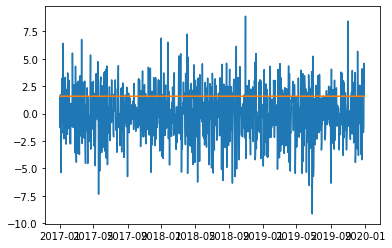

In [10]:
plt.plot(X_test)
#plt.plot(ypred_mean_series) 
plt.plot(ypred_last_series) 


In [11]:
from sklearn import metrics

print(metrics.mean_absolute_error(X_test, ypred_last_series))

2.2172726583318636
